In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from setup import get_datasets, get_results
from joblib import load

X_trains, X_tests, y_trains, y_tests = get_datasets(None)
reg = load('xai_models/reg_model.joblib')

In [17]:
results = []
for i in range(len(X_tests)):  
    reg_predictions = reg.predict(X_tests[i])
    predictions_nominal = [ 0 if x < 0.5 else 1 for x in reg_predictions]
    cm, acc, sen, spe = get_results(predictions_nominal, y_tests[i])
    
    results.append([i, acc, sen, spe])
    
res = pd.DataFrame(data=results, columns=["Test #", "Accuracy", "Sensitivity", "Specificity"])
print(res.describe())

          Test #   Accuracy  Sensitivity  Specificity
count  18.000000  18.000000    18.000000    18.000000
mean    8.500000   0.992100     0.996994     0.987210
std     5.338539   0.013122     0.004976     0.027166
min     0.000000   0.950000     0.980447     0.897611
25%     4.250000   0.992083     0.996101     0.993179
50%     8.500000   0.997500     1.000000     1.000000
75%    12.750000   0.999583     1.000000     1.000000
max    17.000000   1.000000     1.000000     1.000000


In [3]:
res.to_csv('reg_scores.csv')

In [24]:
import shap
shap.initjs()

y_test = np.array(y_tests[0])

X_train_summary = shap.kmeans(X_trains[0], 10)

#single prediction
explainer = shap.KernelExplainer(reg.predict, X_train_summary)
shap_values = explainer.shap_values(X_tests[0].iloc[10, :])

print("actual value: ", y_test[10])
shap.force_plot(explainer.expected_value, shap_values, X_tests[0].iloc[10, :])

actual value:  0


In [25]:
shap_values50 = explainer.shap_values(X_tests[0], nsamples=len(X_tests[0]))
shap.force_plot(explainer.expected_value, shap_values50, X_tests[0])

100%|██████████| 600/600 [00:05<00:00, 112.18it/s]


100%|██████████| 600/600 [00:05<00:00, 112.32it/s]


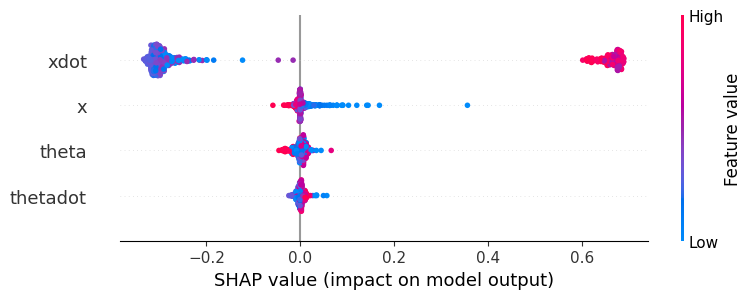

In [26]:
shap_values = explainer.shap_values(X_tests[0])
shap.summary_plot(shap_values, X_tests[0])

In [27]:
#without xdot- the most significant feature
X_trains, X_tests, y_trains, y_tests = get_datasets("xdot")
reg = ExtraTreesRegressor()
for i in range(len(X_trains)):  
    reg.fit(X_trains[i], y_trains[i])

In [28]:
results = []
for i in range(len(X_tests)): 
    mlp_predictions = reg.predict(X_tests[i])
    predictions_nominal = [ 0 if x < 0.5 else 1 for x in mlp_predictions]
    cm, acc, sen, spe = get_results(predictions_nominal, y_tests[i])
    
    results.append([i, acc, sen, spe])
    
res = pd.DataFrame(data=results, columns=["Test #", "Accuracy", "Sensitivity", "Specificity"])

print(res.describe())

          Test #   Accuracy  Sensitivity  Specificity
count  18.000000  18.000000    18.000000    18.000000
mean    8.500000   0.597453     0.468338     0.717285
std     5.338539   0.149520     0.252430     0.222231
min     0.000000   0.444073     0.003425     0.344482
25%     4.250000   0.495000     0.335027     0.567450
50%     8.500000   0.535833     0.474726     0.739877
75%    12.750000   0.635833     0.610072     0.927605
max    17.000000   0.991667     0.993197     1.000000


In [29]:
y_test = np.array(y_tests[0])

X_train_summary = shap.kmeans(X_trains[0], 10)

#single prediction
explainer = shap.KernelExplainer(reg.predict, X_train_summary)
shap_values = explainer.shap_values(X_tests[0].iloc[10, :])

print("actual value: ", y_test[10])
shap.force_plot(explainer.expected_value, shap_values, X_tests[0].iloc[10, :])

actual value:  1


100%|██████████| 600/600 [00:04<00:00, 120.79it/s]


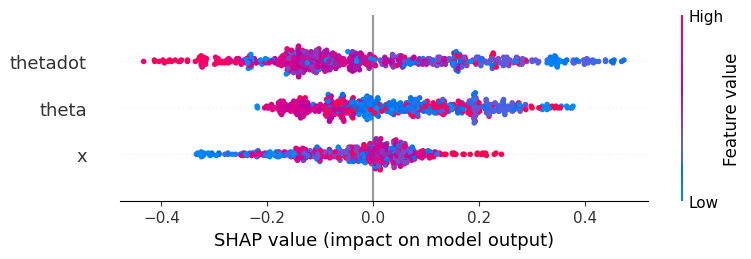

In [30]:
shap_values = explainer.shap_values(X_tests[0])
shap.summary_plot(shap_values, X_tests[0])